This notebook plots the number of distinct users and jobs per month on the EU, ORG, and AUS servers

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
from pathlib import Path

In [2]:
color1 = "#eaac88" #"#d4c6af"
color2 = "#79dd88"

In [3]:
figure_dp = Path("../figures/")
figure_dp.mkdir(parents=True, exist_ok=True)

data_dp = Path("../data/")
data_dp.mkdir(parents=True, exist_ok=True)

In [4]:
from functools import reduce

dfs = {
    "EU": pd.read_csv(data_dp / Path("usegalaxy_eu_stats.csv"), parse_dates=["Month"]),
    "AUS": pd.read_csv(data_dp / Path("usegalaxy_aus_stats.csv"), parse_dates=["Month"]),
    "ORG": pd.read_csv(data_dp / Path("usegalaxy_org_stats.csv"), parse_dates=["Month"])
}

for key in dfs:
    dfs[key] = dfs[key].rename(
        columns={col: f"{col} on {key}" for col in dfs[key].columns if col != "Month"}
    )

merged_dfs = reduce(
    lambda left, right: pd.merge(left, right, on="Month", how="outer"),
    dfs.values()
)

merged_dfs

,Month,Number of active users on EU,Number of jobs on EU,Number of active users on AUS,Number of jobs on AUS,Number of active users on ORG,Number of jobs on ORG
0,2007-01-01,NaN,NaN,NaN,NaN,0,1964
1,2007-02-01,NaN,NaN,NaN,NaN,38,3205
2,2007-03-01,NaN,NaN,NaN,NaN,74,4264
3,2007-04-01,NaN,NaN,NaN,NaN,88,5072
4,2007-05-01,NaN,NaN,NaN,NaN,85,5048
...,...,...,...,...,...,...,...
210,2024-07-01,4323.0,870264.0,1116.0,210999.0,6349,697217
211,2024-08-01,3731.0,769018.0,1186.0,208367.0,6298,614609
212,2024-09-01,4878.0,933733.0,1333.0,192223.0,7332,795706
213,2024-10-01,6364.0,1205733.0,1363.0,327086.0,9985,1057159


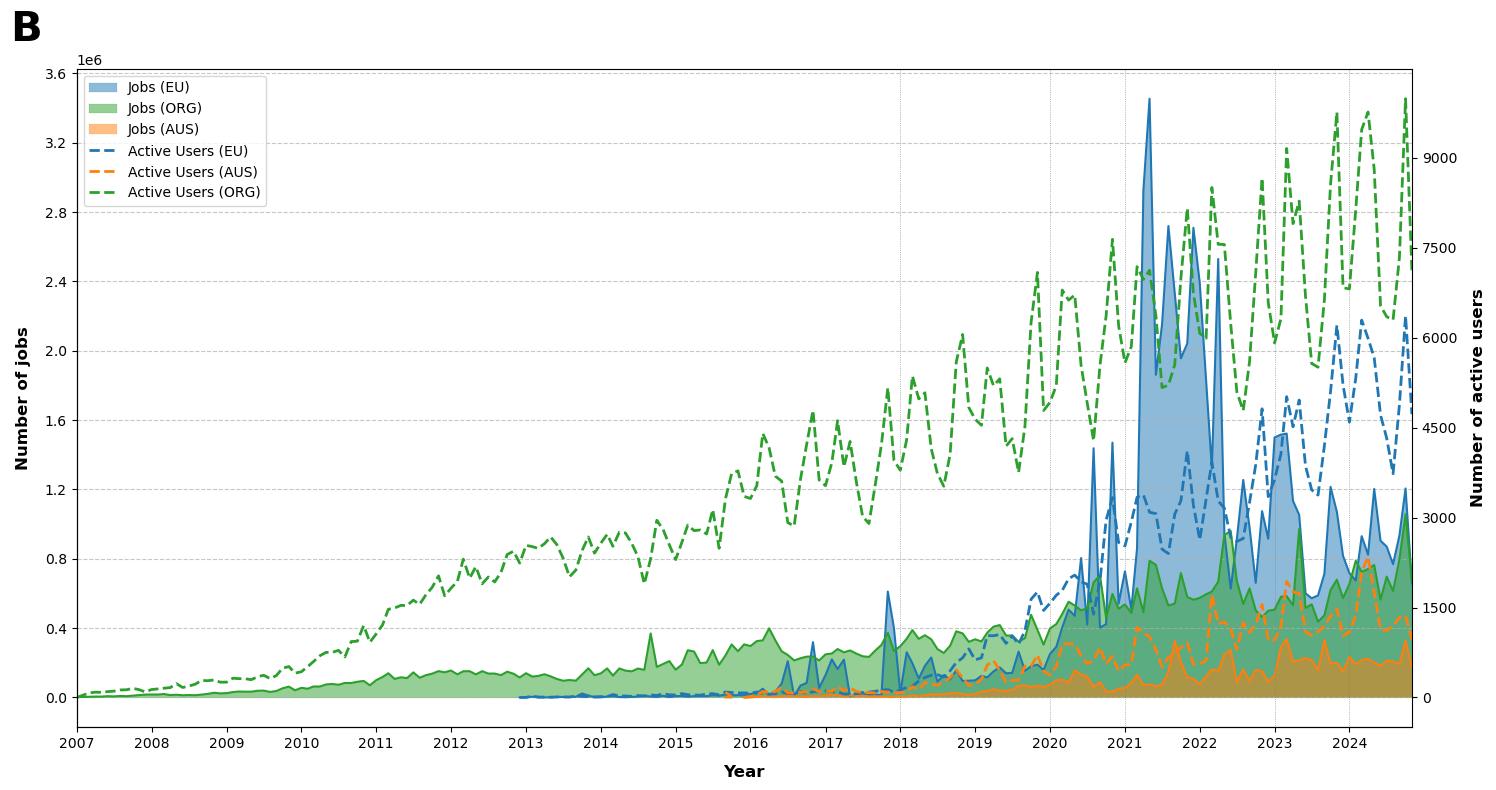

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for each region
colors = {
    "EU": "#1f77b4",   # blue
    "AUS": "#ff7f0e",  # orange
    "ORG": "#2ca02c",  # green
}


# Plot bars for "Number of jobs" for each region
for region in ["EU", "ORG", "AUS"]:
    ax.fill_between(
        merged_dfs["Month"],
        merged_dfs[f"Number of jobs on {region}"],
        color=colors[region],
        linewidth=0.2,
        label=f"Jobs ({region})",
        alpha=0.5,
    )
    ax.plot(
        merged_dfs["Month"],
        merged_dfs[f"Number of jobs on {region}"],
        color=colors[region],
    )

# Create a second y-axis for "Number of active users"
ax2 = ax.twinx()

# Plot lines for "Number of active users" for each region
for region in ["EU", "AUS", "ORG"]:
    ax2.plot(
        merged_dfs["Month"],
        merged_dfs[f"Number of active users on {region}"],
        color=colors[region],
        linewidth=2,
        linestyle="--",
        label=f"Active Users ({region})",
    )


# Vertical lines for specific years
for year in [2018, 2020, 2021, 2023, 2024]:
    ax.axvline(
        x=pd.to_datetime(f"{year}-01-01"),
        color="gray",
        linestyle="dotted",
        linewidth=0.5,
    )

# X and Y axis formatting
ax.set_xlim(merged_dfs["Month"].min(), merged_dfs["Month"].max())
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlabel("Year", fontsize=12, fontweight="bold", labelpad=10)
ax.set_ylabel("Number of jobs", fontsize=12, fontweight="bold", labelpad=10)
ax2.set_ylabel("Number of active users", fontsize=12, fontweight="bold", labelpad=10)

# Y-axis ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Grid
ax.grid(axis="y", linestyle="dashed", alpha=0.7, which="both")
ax.grid(axis="x", which="both", visible=False)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Theme
ax.set_facecolor("white")
ax2.set_facecolor("white")
fig.patch.set_facecolor("white")

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="upper left")

ax.set_title("B", fontsize=30, fontweight='bold', loc="left", pad=20, x=-0.05)


# Layout
plt.tight_layout()

# Save as PNG
fig.savefig(figure_dp / "jobs_and_users.png", dpi=300, bbox_inches='tight')

plt.show()